In [ ]:
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# sonnets.txt
!gdown 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 86.4MB/s]


In [ ]:
data = open('./sonnets.txt').read()

data = data.lower().split('\n')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

input_sequences = []

for line in data:
  this_sequence = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(this_sequence)):
    input_sequences.append(this_sequence[:i+1])

max_seq_len = max([len(x) for x in input_sequences])
seq_padded = np.array(pad_sequences(input_sequences))

inputs, labels = seq_padded[:, :-1], seq_padded[:, -1]

labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 100, input_length=max_seq_len-1))  # -1 because the input will be one less in length than the slices in corpus - last word is to be predicted
model.add(tf.keras.layers.LSTM(156, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(96))
model.add(tf.keras.layers.Dense(total_words/2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 lstm (LSTM)                 (None, 10, 156)           160368    
                                                                 
 dropout (Dropout)           (None, 10, 156)           0         
                                                                 
 lstm_1 (LSTM)               (None, 96)                97152     
                                                                 
 dense (Dense)               (None, 1605)              155685    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                                 
Total params: 5,891,171
Trainable params: 5,891,171
Non-

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if (logs.get('accuracy') > 0.96):
      print("Stopping training")
      self.model.stop_training = True

In [ ]:
NUM_EPOCHS = 150
history = model.fit(inputs, labels, epochs=NUM_EPOCHS, verbose=1)

Epoch 1/150
484/484 [==============================] - 24s 29ms/step - loss: 6.9375 - accuracy: 0.0206
Epoch 2/150
484/484 [==============================] - 4s 9ms/step - loss: 6.5164 - accuracy: 0.0222
Epoch 3/150
484/484 [==============================] - 6s 13ms/step - loss: 6.4301 - accuracy: 0.0231
Epoch 4/150
484/484 [==============================] - 4s 8ms/step - loss: 6.3484 - accuracy: 0.0259
Epoch 5/150
484/484 [==============================] - 4s 7ms/step - loss: 6.2531 - accuracy: 0.0302
Epoch 6/150
484/484 [==============================] - 4s 9ms/step - loss: 6.1441 - accuracy: 0.0363
Epoch 7/150
484/484 [==============================] - 4s 8ms/step - loss: 6.0516 - accuracy: 0.0392
Epoch 8/150
484/484 [==============================] - 4s 8ms/step - loss: 5.9730 - accuracy: 0.0424
Epoch 9/150
484/484 [==============================] - 5s 9ms/step - loss: 5.8950 - accuracy: 0.0441
Epoch 10/150
484/484 [==============================] - 4s 7ms/step - loss: 5.8192 - acc

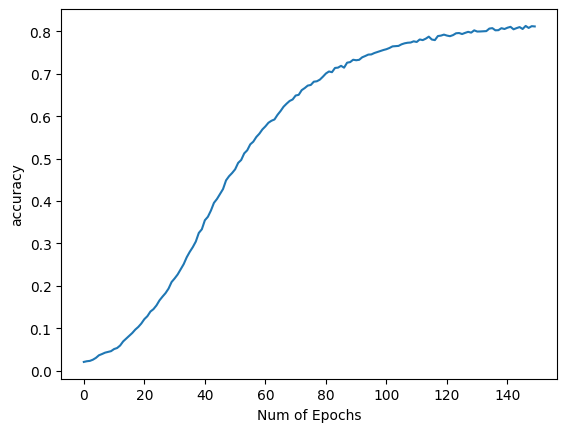

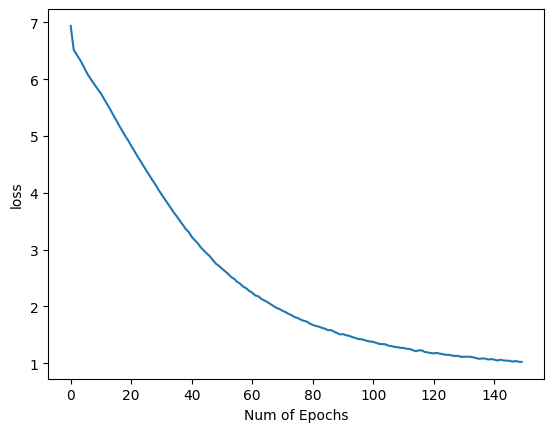

In [ ]:
def plot_metrics(metric):
  plt.plot(history.history[metric])
  plt.xlabel('Num of Epochs')
  plt.ylabel(metric)
  plt.show()

plot_metrics('accuracy')
plot_metrics('loss')

In [ ]:
seed_text = "Oh come yonder lad of the rains"
next_words = 100


for i in range(next_words):
  seq = tokenizer.texts_to_sequences([seed_text])[0]
  seq_pad = pad_sequences([seq], maxlen=max_seq_len-1, padding='pre')
  predicted = model.predict(seq_pad, verbose=0)
  classes = np.argmax(predicted, axis=1)
  output = ""
  for word, index in tokenizer.word_index.items():
    if index == classes:
      output += word
      break
  seed_text += " "  + output
  if i%8 == 0:
    seed_text += "\n"


print(seed_text)


Oh come yonder lad of the rains least
 or else this glutton be woe cross none
 telling scope ' set remain remain fitted free
 begin 'will' lies begin knife doom lies doom
 on new part ' new new new new
 new false for for love for that i
 love none none new strife new part part
 to you were in swear seen new treasure
 you best of 'will of ill rare to
 die cross strife rhyme dearer 'will ' quite
 grew it crystal eyes give decay wrong new
 bar light of brow rare rolling 'will' date
 light good rich forgot rehearse made their best
 treasure new new


In [ ]:
#open text file
text_file = open("lyric.txt", "w")
 
#write string to file
text_file.write(seed_text)
 
#close file
text_file.close()